In [1]:
%pip install ultralytics
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
import os
import yaml
import random
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pandas as pd

In [3]:
root_dir = "./BoneFracturesDetection"

for root, dirs, files in os.walk(root_dir):
    level = root.replace(root_dir, '').count(os.sep)
    indent = '  ' * level
    print(f"{indent}{os.path.basename(root)}/")

BoneFracturesDetection/
  test/
    images/
    labels/
  train/
    images/
    labels/
  valid/
    images/
    labels/


In [4]:
yaml_path="./BoneFracturesDetection/data.yaml"

with open(yaml_path,"r") as file:
    data=yaml.safe_load(file)
print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 10, 'names': ['Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced', 'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse'], 'roboflow': {'workspace': 'iubat-i4ldm', 'project': 'bon-fracture-detection', 'version': 2, 'license': 'Private', 'url': 'https://app.roboflow.com/iubat-i4ldm/bon-fracture-detection/2'}}


In [5]:
data['names']

['Comminuted',
 'Greenstick',
 'Healthy',
 'Linear',
 'Oblique Displaced',
 'Oblique',
 'Segmental',
 'Spiral',
 'Transverse Displaced',
 'Transverse']

In [6]:
class_img={}
j=0

for i in data['names']:
    class_img[j]=i
    j=j+1

class_img

{0: 'Comminuted',
 1: 'Greenstick',
 2: 'Healthy',
 3: 'Linear',
 4: 'Oblique Displaced',
 5: 'Oblique',
 6: 'Segmental',
 7: 'Spiral',
 8: 'Transverse Displaced',
 9: 'Transverse'}

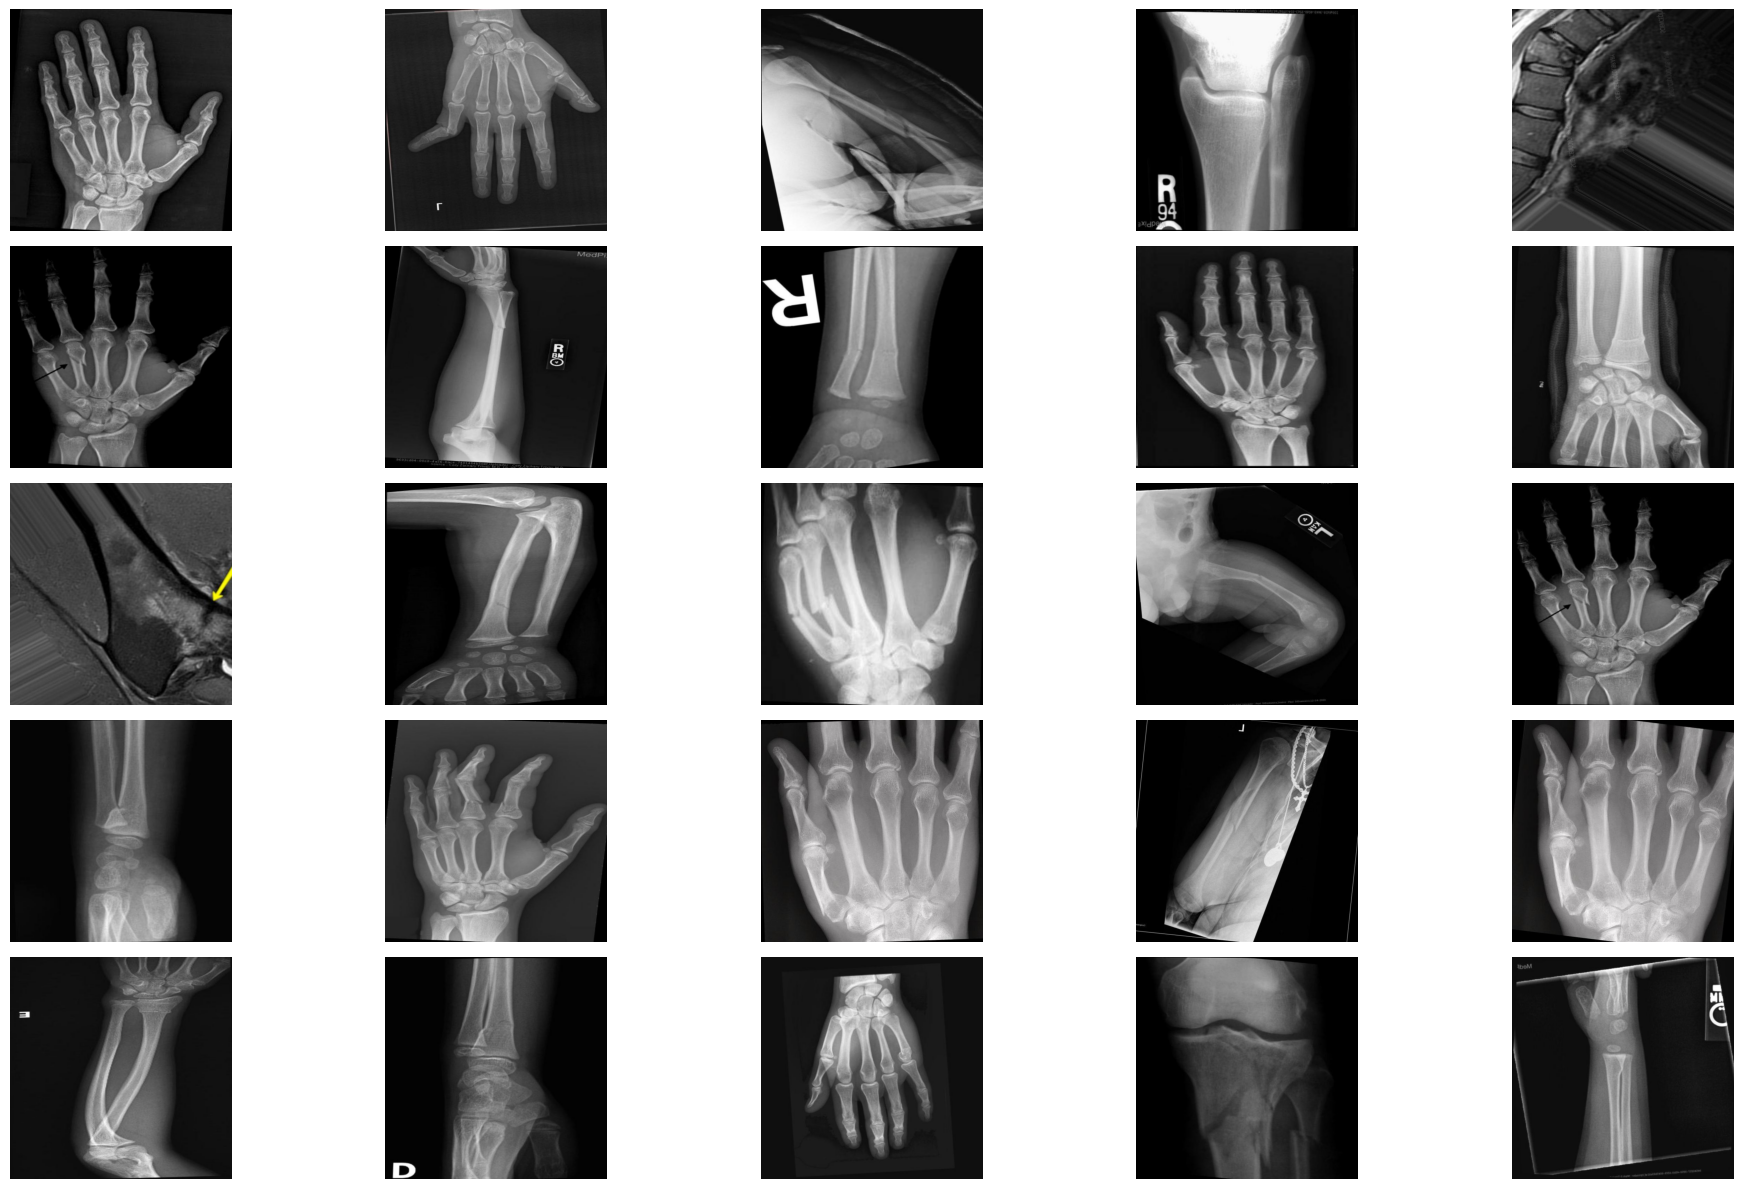

In [7]:
train_images_dir = "./BoneFracturesDetection/train/images"

image_files = [f for f in os.listdir(train_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

sample_files = random.sample(image_files, min(25, len(image_files)))

plt.figure(figsize=(20,12))

for i, img_name in enumerate(sample_files, 1):
    img_path = os.path.join(train_images_dir, img_name)
    img = Image.open(img_path)
    plt.subplot(5,5,i)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
train_dir = "/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/images"
valid_dir = "/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images"
test_dir = "/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images"

train_count = len([f for f in os.listdir(train_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
valid_count = len([f for f in os.listdir(valid_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
test_count = len([f for f in os.listdir(test_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

print(f" Train Image count :{train_count}")
print(f" Test Image count :{test_count}")
print(f" Val Image count :{valid_count}")


plt.figure(figsize=(15,5))
plt.bar(['Train', 'Valid', 'Test'], [train_count, valid_count, test_count], color=['red', 'yellow', 'orange'])
plt.title('Number of Images in Each Dataset Split')
plt.ylabel('Number of Images')
plt.show()

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: '/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/images'


['Train Image count :1347',
 'Test Image count :64',
 'Val Image count :128,]

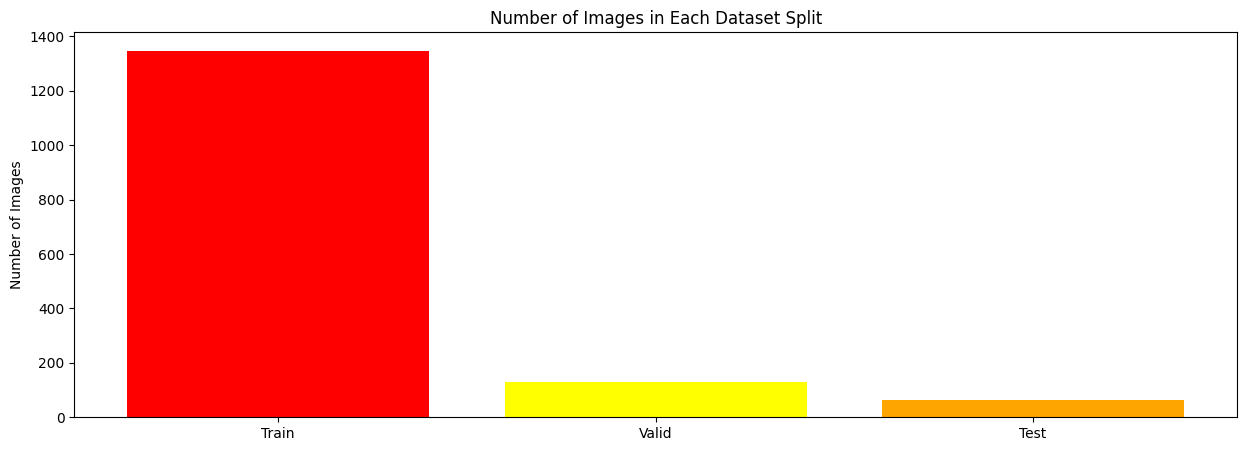

In [ ]:
def plot(image_path,label_path):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]
    
    with open(label_path, "r") as f:
        lines = f.readlines()
    
    for line in lines:
        class_id, x_center, y_center, w, h = map(float, line.strip().split())
        
        # Convert normalized coords to pixel values
        x_center *= width
        y_center *= height
        w *= width
        h *= height
    
        # Get top-left and bottom-right
        x1 = int(x_center - w / 2)
        y1 = int(y_center - h / 2)
        x2 = int(x_center + w / 2)
        y2 = int(y_center + h / 2)
    
        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{class_img[class_id]}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    return image

In [ ]:
train_images_dir = "/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/images"
train_label_dir="/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/labels"

image_files = [f for f in os.listdir(train_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

sample_files = random.sample(image_files, min(10, len(image_files)))

plt.figure(figsize=(30,90))

for i, img_name in enumerate(sample_files, 1):
    img_path = os.path.join(train_images_dir, img_name)
    labelfile= os.path.join(train_label_dir, img_name)
   
    label_path = os.path.splitext(labelfile)[0] + ".txt"
   
    image_with_boxes = plot(img_path, label_path)
    plt.subplot(10,1,i)
    plt.imshow(image_with_boxes)

plt.tight_layout()

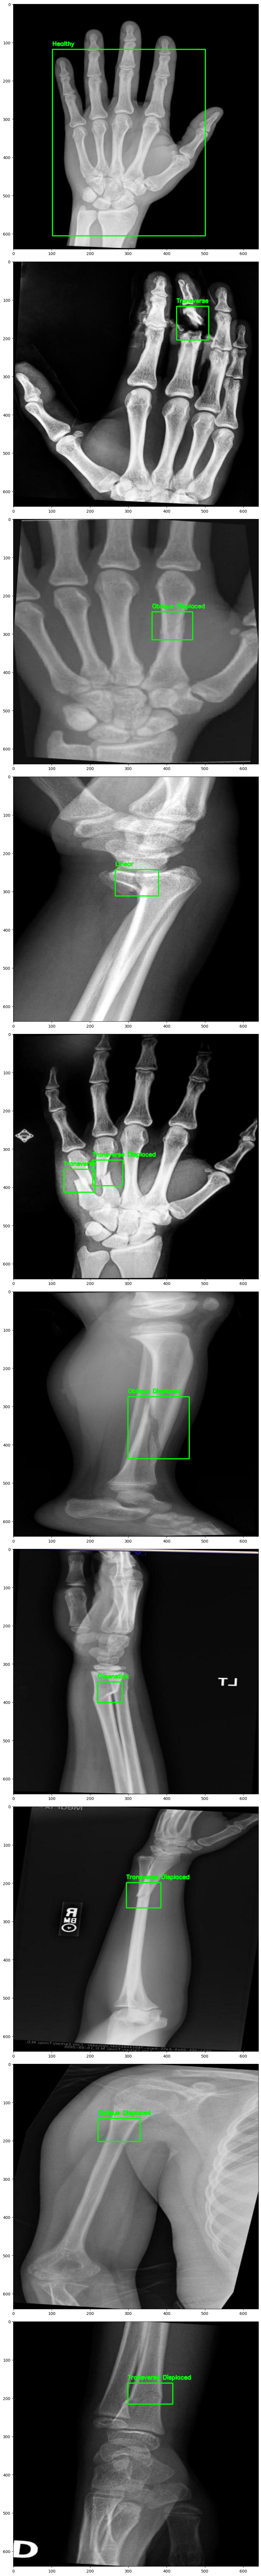

In [ ]:
yaml_path = "/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml"

In [ ]:
model = YOLO("yolov8n.pt")

model.info()

results = model.train(data=yaml_path, epochs=100, batch=-1, imgsz=640, workers=5)

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
Ultralytics 8.3.202 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=False, save=True, save_conf=False, save_crop=False, save_dir=/kaggle/working/runs/detect/train2, save_frames=False, save_json=False, save_period=-1, save_txt=False, scale=0.5, seed=0, shear=0.0, show=False, show_boxes=True, show_conf=True, show_labels=True, simplify=True, single_cls=False, source=None, split=val, stream_buffer=False, task=detect, time=None, tracker=botsort.yaml, translate=0.1, val=True, verbose=True, vid_stride=1, visualize=False, warmup_bias_lr=0.1, warmup_epochs=3.0, warmup_momentum=0.8, weight_decay=0.0005, workers=5, workspace=None
Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    753262  ultralytics.nn.modules.head.Detect           [10, [64, 128, 256]]          
Model summary: 129 layers, 3,012,798 parameters, 3,012,782 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.1±0.2 ms, read: 61.1±17.7 MB/s, size: 26.7 KB)
train: Scanning /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/labels... 1347 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1347/1347 1.1Kit/s 1.2s0.0s
WARNING ⚠️ train: Cache directory /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 8.80G reserved, 0.74G allocated, 5.20G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3012798       8.204         2.600         24.68         20.25        (1, 3, 640, 640)                    list
     3012798       16.41         2.619         20.67         20.71        (2, 3, 640, 640)                    list
     3012798       32.82         2.624         19.54         23.15        (4, 3, 640, 640)                    list
     3012798       65.63         3.081         21.57         35.54        (8, 3, 640, 640)                    list
     3012798       131.3         4.098         37.86          66.7       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 6 for CUDA:0 12.53G/14.74G (85%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 60.8±9.9 MB/s, size: 26.1 KB)
train: Scanning /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/labels... 1347 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1347/1347 1.3Kit/s 1.0s0.0s
WARNING ⚠️ train: Cache directory /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.3±0.3 ms, read: 64.3±20.0 MB/s, size: 32.4 KB)
val: Scanning /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/labels... 128 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 1.0Kit/s 0.1s<0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid is not writeable, cache not saved.
Plotting labels to /kaggle/working/runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000515625), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      1.49G       2.51      5.352      2.358          5        640: 100% ━━━━━━━━━━━━ 225/225 11.1it/s 20.3s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 11.6it/s 0.9s2s
                   all        128        157      0.679     0.0868     0.0814     0.0392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      2/100      1.51G      2.167      4.288      2.016         12        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.7s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.2it/s 0.8s0.1s
                   all        128        157      0.509      0.163      0.109     0.0476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/100      1.52G      2.147      3.978      2.024          3        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.709      0.106     0.0853     0.0371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      4/100      1.54G      2.149      3.646      1.992          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.6it/s 0.8s0.1s
                   all        128        157      0.576      0.246      0.166     0.0759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      5/100      1.56G      2.039      3.245      1.904          5        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.3it/s 0.8s0.1s
                   all        128        157      0.529      0.184      0.177     0.0828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/100      1.57G      2.038      3.043      1.902          6        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.6it/s 0.8s0.1s
                   all        128        157      0.427      0.308      0.244      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/100      1.59G      1.976      2.851      1.867          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.3it/s 0.8s0.1s
                   all        128        157       0.45      0.306      0.258      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/100      1.61G      1.961      2.708      1.841          1        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.7it/s 0.8s0.1s
                   all        128        157      0.724      0.192      0.295      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/100      1.62G      1.905      2.543      1.786          4        640: 100% ━━━━━━━━━━━━ 225/225 12.0it/s 18.7s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.1it/s 0.8s0.1s
                   all        128        157       0.76      0.171      0.286      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/100      1.64G      1.851      2.387      1.734          5        640: 100% ━━━━━━━━━━━━ 225/225 12.0it/s 18.7s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.5it/s 0.8s0.1s
                   all        128        157      0.449      0.339      0.318      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/100      1.66G      1.867      2.323       1.77          4        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.746      0.342      0.445      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     12/100      1.68G      1.839      2.189      1.742          3        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.3it/s 0.8s0.1s
                   all        128        157      0.607      0.287      0.391      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     13/100      1.69G      1.794      2.061      1.709          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.5it/s 0.8s0.1s
                   all        128        157      0.621      0.357       0.44      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     14/100      1.71G      1.794      1.996      1.696          7        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.6it/s 0.8s0.1s
                   all        128        157      0.788      0.331       0.42      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     15/100      1.73G      1.761      1.916      1.662          6        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.6it/s 0.8s0.1s
                   all        128        157      0.837       0.34      0.471      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     16/100      1.74G      1.742       1.93      1.647          7        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.7it/s 0.8s0.1s
                   all        128        157      0.535      0.547       0.54      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     17/100      1.76G      1.701      1.844      1.627          3        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.3it/s 0.8s0.1s
                   all        128        157      0.438      0.582      0.573      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     18/100      1.78G      1.714      1.799      1.618          3        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.5it/s 0.8s0.1s
                   all        128        157      0.626      0.505      0.563      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     19/100       1.8G      1.687      1.718      1.606          8        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.7it/s 0.8s0.1s
                   all        128        157      0.719      0.538      0.679      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     20/100      1.81G      1.703      1.685      1.613          8        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.4it/s 0.8s0.1s
                   all        128        157       0.65       0.54      0.633      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     21/100      1.83G      1.688      1.681      1.599          8        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 12.6it/s 0.9s.2s
                   all        128        157      0.725      0.588       0.66      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     22/100      1.85G      1.659       1.65      1.589          4        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.4it/s 0.8s0.1s
                   all        128        157      0.542      0.507      0.576       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     23/100      1.87G      1.655      1.567      1.594          4        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.718      0.567      0.635      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     24/100      1.88G      1.631      1.557      1.552          8        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.751      0.562      0.684      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     25/100       1.9G       1.63      1.486      1.547          6        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.698      0.693      0.751      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     26/100      1.92G      1.612      1.476       1.55          4        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.1it/s 0.8s0.1s
                   all        128        157      0.709      0.723      0.762      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/100      1.93G      1.568      1.425      1.513          8        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.687      0.617      0.686      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/100      1.95G      1.571       1.43      1.529          4        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.3it/s 0.8s0.1s
                   all        128        157      0.793      0.671      0.761      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/100      1.97G      1.555      1.393      1.502         11        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.7it/s 0.8s0.1s
                   all        128        157      0.808      0.697      0.778       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     30/100      1.98G       1.56      1.336      1.493          3        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.6it/s 0.8s0.1s
                   all        128        157      0.728      0.695      0.774      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     31/100      1.99G      1.556      1.382      1.499          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.9it/s 0.8s0.1s
                   all        128        157      0.806      0.631      0.738      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     32/100      2.02G       1.55       1.35      1.482          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.9it/s 0.8s0.1s
                   all        128        157      0.783       0.67      0.785      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     33/100      2.04G      1.538      1.311       1.48          4        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.819      0.673       0.78      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     34/100      2.05G      1.493      1.265      1.449          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.9it/s 0.8s0.1s
                   all        128        157      0.825      0.686      0.795      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/100      2.07G      1.504       1.25      1.448          5        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.759      0.727      0.829      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/100      2.09G      1.511      1.242      1.447          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.5it/s 0.8s0.1s
                   all        128        157      0.784      0.764      0.822      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/100       2.1G      1.459      1.209       1.43          6        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.6it/s 0.8s0.1s
                   all        128        157      0.856      0.687      0.799      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     38/100      2.12G       1.47      1.201       1.43          6        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.804      0.742      0.865      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     39/100      2.14G      1.478      1.191       1.43          4        640: 100% ━━━━━━━━━━━━ 225/225 12.3it/s 18.3s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.0it/s 0.8s0.1s
                   all        128        157      0.832      0.701      0.821      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     40/100      2.15G      1.451      1.171      1.425          2        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.5it/s 0.8s0.1s
                   all        128        157      0.785      0.722      0.798      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     41/100      2.17G      1.469      1.166      1.421          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.2it/s 0.8s0.1s
                   all        128        157      0.871      0.675      0.821      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     42/100      2.18G      1.461      1.136      1.419          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.6it/s 0.8s0.1s
                   all        128        157      0.865       0.73      0.824      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     43/100      2.21G      1.432      1.129      1.386          3        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.8it/s 0.8s0.1s
                   all        128        157      0.772      0.706      0.804       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     44/100      2.22G      1.403      1.089      1.382          8        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.9it/s 0.8s0.1s
                   all        128        157      0.854      0.754      0.838      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     45/100      2.24G      1.399      1.071      1.375          5        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.649      0.797      0.848       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/100      2.26G      1.385       1.06      1.362          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.916      0.733      0.854      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/100      2.28G      1.379      1.083      1.373          2        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.4it/s 0.8s0.1s
                   all        128        157      0.838      0.846      0.899       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/100      2.29G      1.406      1.083      1.382          9        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157       0.78      0.772      0.856      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/100      2.31G      1.394      1.063      1.374          4        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.7it/s 0.7s0.1s
                   all        128        157      0.768      0.834      0.863      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     50/100      2.33G      1.363      1.019      1.334          6        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.6it/s 0.8s0.1s
                   all        128        157      0.816      0.717      0.841      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     51/100      2.34G      1.354      1.002      1.341          8        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.5it/s 0.8s0.1s
                   all        128        157      0.838      0.769      0.875      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     52/100      2.36G      1.394       1.02      1.357          6        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.7it/s 0.7s0.1s
                   all        128        157      0.869      0.726      0.876      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     53/100      2.37G      1.357       1.01      1.361          7        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.883      0.774      0.883       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     54/100      2.39G      1.314     0.9568      1.314          2        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.8it/s 0.8s0.1s
                   all        128        157      0.884      0.897      0.904      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     55/100      2.41G       1.31     0.9575      1.317          9        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.4it/s 0.8s0.1s
                   all        128        157      0.918      0.858      0.903      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     56/100      2.43G      1.331     0.9757      1.335          4        640: 100% ━━━━━━━━━━━━ 225/225 12.3it/s 18.3s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.905       0.76      0.874      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     57/100      2.45G      1.339     0.9647      1.323          4        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.0it/s 0.8s0.1s
                   all        128        157      0.865      0.839      0.897      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     58/100      2.46G      1.308     0.9268      1.321          4        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.6it/s 0.8s0.1s
                   all        128        157      0.829      0.828      0.887      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     59/100      2.48G      1.304     0.8888      1.309          2        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.0it/s 0.8s0.1s
                   all        128        157      0.854      0.812      0.885      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     60/100       2.5G      1.282     0.9198      1.293          7        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.869      0.841      0.892      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     61/100      2.51G      1.286     0.9271        1.3          7        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.7it/s 0.8s0.1s
                   all        128        157      0.863      0.842      0.902      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     62/100      2.53G      1.305     0.9299      1.306          6        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.3it/s 0.8s0.1s
                   all        128        157      0.839      0.847      0.903      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     63/100      2.55G      1.276     0.8962      1.286          6        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.0it/s 0.8s0.1s
                   all        128        157      0.852      0.847      0.909      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     64/100      2.56G      1.265     0.8892      1.285          7        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.9it/s 0.8s0.1s
                   all        128        157      0.857      0.882      0.905      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     65/100      2.58G      1.263      0.891      1.288          6        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.7it/s 0.8s0.1s
                   all        128        157      0.899      0.884      0.922      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     66/100       2.6G      1.256     0.8723      1.283          6        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.1it/s 0.8s0.1s
                   all        128        157      0.924      0.857      0.912      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     67/100      2.62G      1.248     0.8887      1.279          2        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.866       0.85      0.909      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     68/100      2.63G      1.224     0.8658      1.256          4        640: 100% ━━━━━━━━━━━━ 225/225 12.3it/s 18.3s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 15.2it/s 0.7s0.1s
                   all        128        157      0.881      0.864      0.917      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     69/100      2.65G      1.252       0.85       1.28          2        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.1it/s 0.8s0.1s
                   all        128        157      0.885      0.875      0.919       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     70/100      2.67G       1.24     0.8459      1.258          3        640: 100% ━━━━━━━━━━━━ 225/225 11.9it/s 18.9s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.4it/s 0.8s0.1s
                   all        128        157      0.851      0.828      0.904      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     71/100      2.68G       1.23     0.8442      1.261          7        640: 100% ━━━━━━━━━━━━ 225/225 12.0it/s 18.7s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.6it/s 0.8s0.1s
                   all        128        157      0.889      0.846      0.927      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     72/100       2.7G      1.221      0.834      1.251          4        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.902      0.832      0.918      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     73/100      2.72G      1.208      0.841      1.255          6        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.8it/s 0.8s0.1s
                   all        128        157      0.888      0.841      0.914       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     74/100      2.74G      1.201     0.8184      1.245          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.3it/s 0.8s0.1s
                   all        128        157      0.923      0.836      0.914      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     75/100      2.75G      1.198     0.8111      1.232          4        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.4it/s 0.8s0.1s
                   all        128        157      0.832      0.835      0.901      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     76/100      2.77G      1.181     0.7917      1.223          7        640: 100% ━━━━━━━━━━━━ 225/225 12.0it/s 18.7s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.852      0.878      0.912      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     77/100      2.79G      1.169     0.7747      1.217          4        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.6it/s 0.8s0.1s
                   all        128        157      0.871      0.857      0.917      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     78/100       2.8G      1.169     0.8013      1.227          7        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157       0.84      0.877       0.92      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     79/100      2.82G       1.19     0.7933       1.23          7        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.5it/s 0.8s0.1s
                   all        128        157      0.859      0.851      0.903      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     80/100      2.84G      1.184     0.7777      1.222          6        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.836      0.868      0.921      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     81/100      2.86G      1.132     0.7532      1.197          3        640: 100% ━━━━━━━━━━━━ 225/225 12.1it/s 18.6s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.4it/s 0.8s0.1s
                   all        128        157      0.878      0.876      0.925       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     82/100      2.87G      1.155     0.7598      1.211         10        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.3it/s 0.8s0.1s
                   all        128        157      0.875      0.891       0.92      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     83/100      2.89G      1.151     0.7837      1.218          7        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.8it/s 0.7s0.1s
                   all        128        157      0.859      0.869      0.929      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     84/100      2.91G      1.136     0.7437      1.197          7        640: 100% ━━━━━━━━━━━━ 225/225 12.0it/s 18.7s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.4it/s 0.8s0.1s
                   all        128        157      0.874       0.87      0.924       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     85/100      2.92G      1.129     0.7595      1.211          9        640: 100% ━━━━━━━━━━━━ 225/225 12.3it/s 18.3s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.3it/s 0.8s0.1s
                   all        128        157      0.891      0.873      0.931      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     86/100      2.93G      1.137     0.7506      1.196          6        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.5it/s 0.8s0.1s
                   all        128        157      0.899      0.881      0.918      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     87/100      2.96G       1.12     0.7306      1.202          2        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.0it/s 0.8s0.1s
                   all        128        157      0.886      0.889       0.93      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     88/100      2.97G      1.128     0.7622      1.199          5        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.8it/s 0.8s0.1s
                   all        128        157      0.862      0.881      0.918       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     89/100      2.99G      1.123     0.7434      1.193          6        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.886      0.879      0.909      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     90/100      3.01G      1.108     0.7333      1.195          4        640: 100% ━━━━━━━━━━━━ 225/225 12.2it/s 18.4s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.9it/s 0.8s0.1s
                   all        128        157      0.871       0.87      0.922       0.48
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     91/100      3.03G      1.049     0.5579      1.185          3        640: 100% ━━━━━━━━━━━━ 225/225 12.0it/s 18.7s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.3it/s 0.8s0.1s
                   all        128        157      0.857       0.87      0.917      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     92/100      3.04G      1.037     0.5455      1.186          3        640: 100% ━━━━━━━━━━━━ 225/225 12.5it/s 18.0s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 13.4it/s 0.8s0.1s
                   all        128        157      0.864      0.866       0.91      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     93/100      3.06G      1.023     0.5463      1.182          4        640: 100% ━━━━━━━━━━━━ 225/225 12.4it/s 18.2s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.0it/s 0.8s0.1s
                   all        128        157      0.871      0.863      0.913      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     94/100      3.08G      1.001     0.5256      1.165          3        640: 100% ━━━━━━━━━━━━ 225/225 12.4it/s 18.2s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.6it/s 0.8s0.1s
                   all        128        157      0.882      0.872      0.922       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     95/100       3.1G      1.003     0.5414      1.173          4        640: 100% ━━━━━━━━━━━━ 225/225 12.4it/s 18.2s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.6it/s 0.8s0.1s
                   all        128        157      0.881      0.877      0.917      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     96/100      3.11G     0.9927     0.5264      1.163          5        640: 100% ━━━━━━━━━━━━ 225/225 12.4it/s 18.1s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.876      0.884      0.917      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     97/100      3.12G     0.9715     0.5207      1.154          3        640: 100% ━━━━━━━━━━━━ 225/225 12.4it/s 18.2s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.2it/s 0.8s0.1s
                   all        128        157      0.885      0.898      0.915      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     98/100      3.15G     0.9718     0.5201      1.152          2        640: 100% ━━━━━━━━━━━━ 225/225 12.4it/s 18.1s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.5it/s 0.8s0.1s
                   all        128        157      0.883      0.897      0.917      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     99/100      3.16G     0.9774     0.5121      1.158          3        640: 100% ━━━━━━━━━━━━ 225/225 12.4it/s 18.2s<0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.8it/s 0.7s0.1s
                   all        128        157       0.89      0.885      0.918      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    100/100      3.18G      0.975     0.5101      1.155          3        640: 100% ━━━━━━━━━━━━ 225/225 12.5it/s 18.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 14.5it/s 0.8s0.1s
                   all        128        157       0.88      0.891      0.922      0.478

100 epochs completed in 0.542 hours.
Optimizer stripped from /kaggle/working/runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from /kaggle/working/runs/detect/train2/weights/best.pt, 6.3MB

Validating /kaggle/working/runs/detect/train2/weights/best.pt...
Ultralytics 8.3.202 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 7.8it/s 1.4s<0.1s
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
                   all        128        157      0.876      0.884      0.917      0.492
            Comminuted         15         15      0.965      0.733      0.778      0.476
            Greenstick         10         10      0.837        0.6      0.581      0.226
               Healthy          7          7      0.928          1      0.995      0.754
                Linear          1          1      0.773          1      0.995      0.298
     Oblique Displaced         30         30      0.961      0.867      0.952      0.441
               Oblique          7          7          1       0.92      0.995      0.567
             Segmental          3          3      0.416          1      0.995      0.806
                Spiral          5          5      0.952          1      0.995      0.444
  Transverse Displaced         53         65      0.932      0.844      0.906      0.377
            Transverse         11         14          1      0.876      0.983      0.528
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to /kaggle/working/runs/detect/train2

In [ ]:
output_dir = "/kaggle/working/runs/detect/train"

plot_files = [
    "BOXP_curve.png", "BoxPR_curve.png", "BoxF1_curve.png", "BoxR_curve.png",
    "confusion_matrix.png", "confusion_matrix_normalized.png",
    "labels.jpg", "labels_correlogram.jpg", "results.png"
]

existing_plots = [f for f in plot_files if os.path.exists(os.path.join(output_dir, f))]

for file in existing_plots:
    img_path = os.path.join(output_dir, file)
    img = Image.open(img_path)
    plt.figure(figsize=(15, 7))
    plt.imshow(img)
    plt.title(file)
    plt.axis('off')
    plt.show()

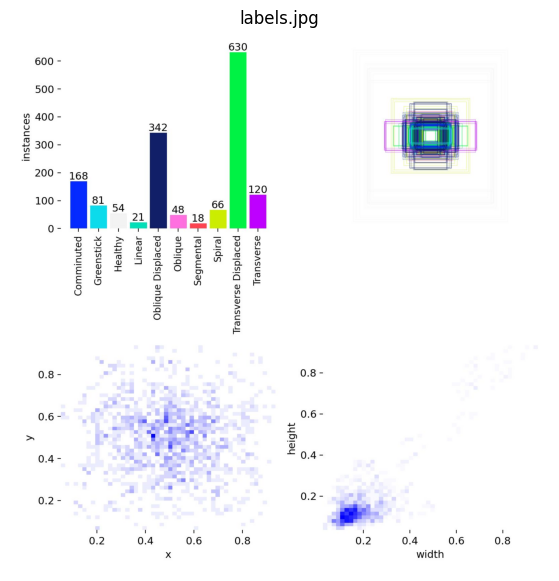

In [ ]:
model_result=pd.read_csv("/kaggle/working/runs/detect/train2/results.csv")

In [ ]:
model_result

OUt24: Tabelle einfügen? 

In [ ]:
model_result.columns = model_result.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

sns.lineplot(x='epoch', y='train/box_loss', data=model_result, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=model_result, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=model_result, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=model_result, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=model_result, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=model_result, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=model_result, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=model_result, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=model_result, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=model_result, ax=axs[4,1])

axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

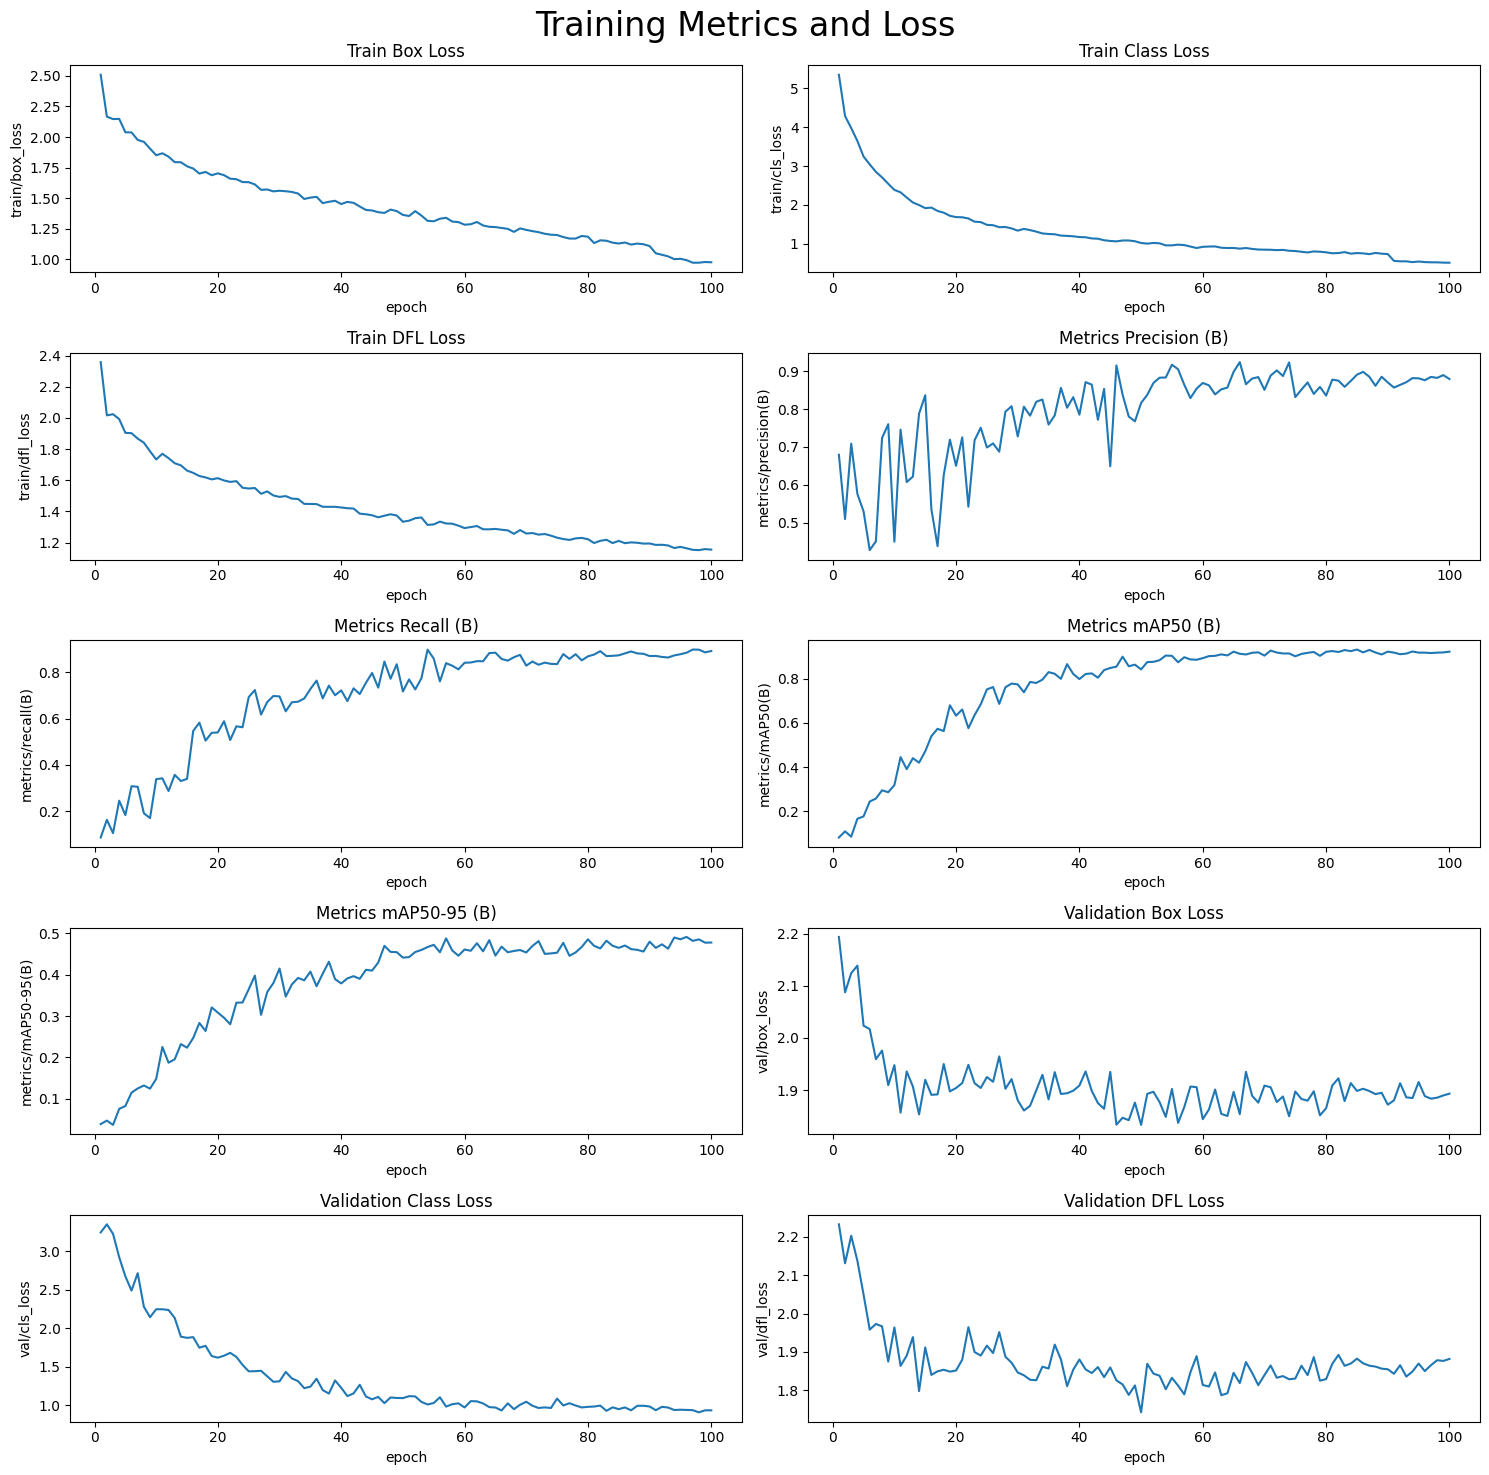

In [ ]:
original_images_path = '/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images'
labels_path = '/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/labels'

class_names = ['Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced', 'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse']


image_files = [f for f in os.listdir(original_images_path) if f.lower().endswith('.jpg')]


step = max(1, len(image_files) // 10)
selected_images = image_files[::step][:10]

rows, cols = 10, 2
fig, axes = plt.subplots(rows, cols, figsize=(16, 40))

test_model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")

def draw_boxes_from_yolo_label(img, label_file, class_names):
    h, w = img.shape[:2]
    with open(label_file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        cls, x_center, y_center, width, height = map(float, line.strip().split())
        cls = int(cls)
        
        
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)
        
        color = (255, 0, 0)
        label = f"{class_names[cls]}"
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

for i, img_name in enumerate(selected_images):
    img_path = os.path.join(original_images_path, img_name)
    img = cv2.imread(img_path)
    img_orig_with_boxes = img.copy()

    label_file = os.path.join(labels_path, img_name.replace('.jpg', '.txt'))


    if os.path.exists(label_file):
        draw_boxes_from_yolo_label(img_orig_with_boxes, label_file, class_names)
    else:
        print(f"Label file missing for {img_name}")

    img_orig_rgb = cv2.cvtColor(img_orig_with_boxes, cv2.COLOR_BGR2RGB)

    
    results = test_model.predict(source=img_path, imgsz=640, conf=0.5)  
    print(f"{img_name}: Detected boxes count: {len(results[0].boxes)}")  

    pred_annotated = results[0].plot(line_width=3)
    pred_annotated_rgb = cv2.cvtColor(pred_annotated, cv2.COLOR_BGR2RGB)

    axes[i, 0].imshow(img_orig_rgb)
    axes[i, 0].set_title("Original with Label Boxes", fontsize=12)
    axes[i, 0].axis('off')

    axes[i, 1].imshow(pred_annotated_rgb)
    axes[i, 1].set_title("Prediction", fontsize=12)
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/41_jpg.rf.b489fc8e3d5b30c5f52489a8261fb1eb.jpg: 640x640 (no detections), 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
41_jpg.rf.b489fc8e3d5b30c5f52489a8261fb1eb.jpg: Detected boxes count: 0

image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/109_jpg.rf.3e2162dfc1b9593890ecf795154614a9.jpg: 640x640 1 Healthy, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
109_jpg.rf.3e2162dfc1b9593890ecf795154614a9.jpg: Detected boxes count: 1

image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/192_jpg.rf.0adadbba3dc33de031fd6582c68f7765.jpg: 640x640 1 Transverse Displaced, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
192_jpg.rf.0adadbba3dc33de031fd6582c68f7765.jpg: Detected boxes count: 1

image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/38_jpg.rf.2a187fe8c1cf24cde4d701d27dc2a11e.jpg: 640x640 1 Transverse Displaced, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
38_jpg.rf.2a187fe8c1cf24cde4d701d27dc2a11e.jpg: Detected boxes count: 1

image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/97_jpg.rf.0208a4590f01329f931c84fcf294fb8c.jpg: 640x640 1 Oblique Displaced, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
97_jpg.rf.0208a4590f01329f931c84fcf294fb8c.jpg: Detected boxes count: 1

image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/50_jpg.rf.947f4c229bee0c92a4e6a9ac5a57db6d.jpg: 640x640 1 Transverse Displaced, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
50_jpg.rf.947f4c229bee0c92a4e6a9ac5a57db6d.jpg: Detected boxes count: 1

image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/29_jpg.rf.e58e5474c3bfe22386d7fc8ff275812a.jpg: 640x640 1 Transverse Displaced, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
29_jpg.rf.e58e5474c3bfe22386d7fc8ff275812a.jpg: Detected boxes count: 1

image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/102_jpg.rf.2a24ccdf9a3242177f430875fe80a0c0.jpg: 640x640 1 Transverse Displaced, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
102_jpg.rf.2a24ccdf9a3242177f430875fe80a0c0.jpg: Detected boxes count: 1

image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/17_jpg.rf.9b16288d874755fefefcb36dcd646ea4.jpg: 640x640 1 Transverse Displaced, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
17_jpg.rf.9b16288d874755fefefcb36dcd646ea4.jpg: Detected boxes count: 1

image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images/13_mri_0_49_jpeg.rf.287af0d1971aa7104de1426e9b58b921.jpg: 640x640 1 Comminuted, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
13_mri_0_49_jpeg.rf.287af0d1971aa7104de1426e9b58b921.jpg: Detected boxes count: 1

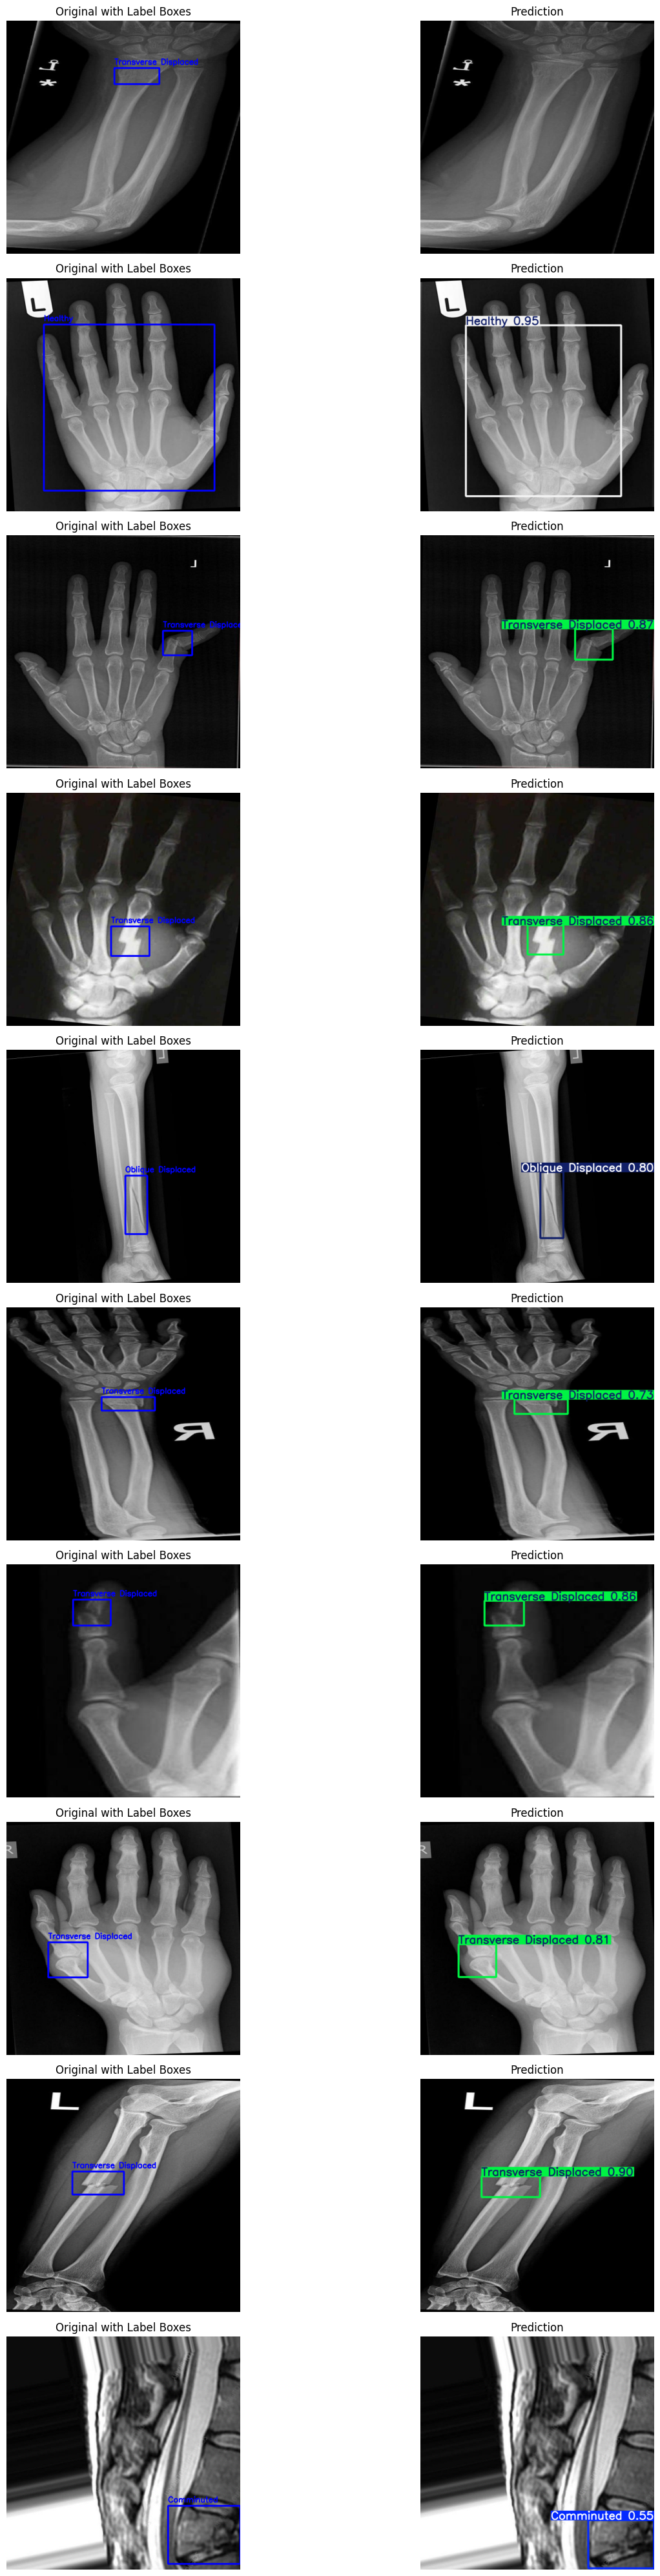